In [1]:
import pandas as pd
df = pd.read_csv('Dataset/salaries _2.csv', sep=',')

df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [2]:
#Procura se existe algum dado nulo na base de dados
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [4]:
#Segmentar os dados entre escalares e categóricos
dados_numericos = df.drop(columns = ['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size'])
dados_categoricos = df[['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']]

#Normalizar os dados categóricos
dados_categoricos_normalizados = pd.get_dummies(data=dados_categoricos, prefix_sep = '_', dtype=int)
dados_categoricos_normalizados

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Developer,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16489,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
16490,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
16491,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
16492,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [5]:
#Treinar o modelo normalizador para os dados numéricos
#pq normalizar os dados? garantir para que os padrões não afetem as outras variáveis.
from sklearn import preprocessing
from pickle import dump

normalizador = preprocessing.MinMaxScaler()
modelo_normalizador = normalizador.fit(dados_numericos) #vai guardar os coeficientes aplicados entre os dados numéricos para que fique entre 0 e 1

#Normalizar a base de dados de entrada
dados_numericos_normalizados = modelo_normalizador.transform(dados_numericos)

#Criar um Data Frame com os dados normalizados (categóricos e numéricos)
#Converter os dados numéricos normalizados em Data Frame
dados_numericos_normalizados = pd.DataFrame(data=dados_numericos_normalizados, columns=['work_year', 'salary', 'salary_in_usd', 'remote_ratio'])

#Juntar com os dados categóricos normalizados
dados_normalizados_final = dados_numericos_normalizados.join(dados_categoricos_normalizados, how ='left')
dump(modelo_normalizador, open('Models/normalizador_salaries.pkl', 'wb'))   #write binary = vai escrever em binário o modelo

In [6]:
dados_normalizados_final.head(5)

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
0,1.0,0.003488,0.133758,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0.001843,0.070064,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0.003818,0.146497,0.0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1.0,0.003159,0.121019,0.0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,0.007438,0.286624,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [7]:
df['work_year'].value_counts()

work_year
2023    8519
2024    6027
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [8]:
#CLUSTERIZAÇÃO
#Determinar o número ótimo de grupos pela distorção
from sklearn.cluster import KMeans  #Clusterizador
import matplotlib.pyplot as plt   #Para gráficos
import math  #Matemática
from scipy.spatial.distance import cdist  #Para calcular a distância e distorções
import numpy as np  #Para procedimentos numéricos


distortions = []
K = range (1, 101)  #Vetor que vai de 1 a 100

#os clusters são as classes/grupos gerados

for i in K:
  #treinar iterativamente conforme n_cluster = K[i]
  dados_kmeans_model = KMeans(n_clusters = i).fit(dados_normalizados_final)     #fit = treina       #i = quantos clusters eu quero
  distortions.append(
      sum(np.min(
          cdist(dados_normalizados_final, dados_kmeans_model.cluster_centers_, 'euclidean'), axis = 1)/dados_normalizados_final.shape[0])
          #pega os centroides e calcula as distâncias e divide pelo tamanho da base(shape[0])
          #pega a soma da menor distorção(a menor distância do centróide) e manda para a lista de distortions
    )

print(distortions)

C:\Users\Alberth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alberth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alberth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

[1.4700056770347556, 1.3380320006392457, 1.2726914461238699, 1.208883348997623, 1.1682686343662416, 1.0896553541902163, 1.057212006528451, 1.0339500493914355, 0.9961868126252096, 0.9556681265227069, 0.944241371766725, 0.9323996729539985, 0.8695333358782038, 0.8600953909924085, 0.846668112956278, 0.8376802353066776, 0.8168265582155321, 0.7583578000562621, 0.7600253294747921, 0.7435028089142685, 0.7319093041886536, 0.7255285269217769, 0.7311421603066665, 0.6945082779232773, 0.7019236042652229, 0.6867530367959428, 0.6685223601040275, 0.6787029325460849, 0.6535699773897329, 0.6493738819614918, 0.6337414574778936, 0.6464955106675145, 0.6269700746994825, 0.6204447900069546, 0.6153825419976607, 0.6207547524233283, 0.5983361052468491, 0.6181587393236083, 0.6090039074548108, 0.5908089915293961, 0.59149553737578, 0.5897211815656782, 0.5889061126776027, 0.5784379829629193, 0.5759083504991064, 0.5550915182968017, 0.5713421553108315, 0.5623131404826377, 0.5500639070370726, 0.539910522094338, 0.5465

In [9]:
len(distortions)

100

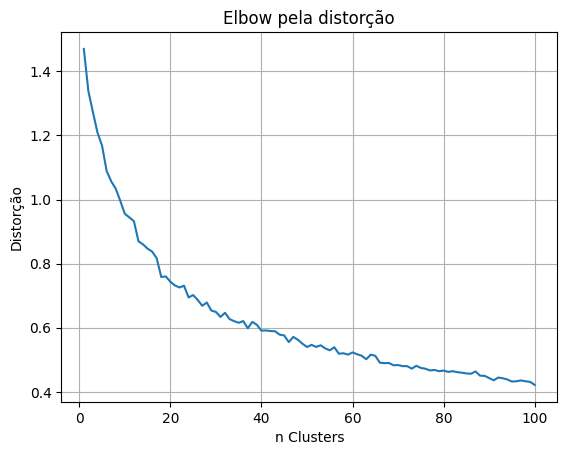

In [10]:
#Exibir o gráfico das distorções
fig, ax = plt.subplots()
ax.plot(K, distortions)
ax.set(xlabel = 'n Clusters', ylabel = 'Distorção', title = 'Elbow pela distorção')
ax.grid()
fig.savefig('elbow_distorcao.png')
plt.show()

#Quanto mais centroide, maior a distorção

In [11]:
#Calcular o número ótimo de clusters
x0 = K[0]
y0 = distortions[0]
xn = K[len(K)-1]
yn = distortions[len(distortions)-1]

#Iterar nos pontos gerados durante os treinamentos preliminares
distancias = []
for i in range(len(distortions)):
  x = K[i]
  y = distortions[i]
  #distância sempre será absoluto.
  numerador = abs((yn - y0)*x - (xn-x0)*y + xn*y0 - yn*x0)  #cálculo da distância entre 2 pontos
  denominador = math.sqrt((yn - y0) ** 2 + (xn - x0) ** 2)  #calcula o módulo da distância entre 2 pontos
  distancias.append(numerador/denominador)

#Maior distância
n_clusters_otimo = K[distancias.index(np.max(distancias))]

#treinar o modelo definitivo
kmeans_model = KMeans(n_clusters = n_clusters_otimo, random_state=42).fit(dados_normalizados_final)     #fit = treina       #i = quantos clusters eu quero

#salvar o modelo definitivo
from pickle import dump
dump(kmeans_model, open('Models/salarios_clusters_2024.pkl', 'wb'))

C:\Users\Alberth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
print(n_clusters_otimo)

24


In [25]:
idx_aleatorio = np.random.randint(0, len(dados_normalizados_final))

instancia_aleatoria = dados_normalizados_final.iloc[[idx_aleatorio]]  #localizar pela linha
instancia_aleatoria

idx_aleatorio = np.random.randint(0, len(dados_normalizados_final))

instancia_aleatoria = dados_normalizados_final.iloc[[idx_aleatorio]]

print('Grupo predito:', kmeans_model.predict(instancia_aleatoria)[0])

Grupo predito: 11
